In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl


TEST_SPLIT = 0.2
SEED = 41

IMAGES_PATH = "/home/peter/Pictures/thermometer-photos/flat/"


def load_dataset():
    x_train = tf.keras.utils.image_dataset_from_directory(
        IMAGES_PATH,
        labels=None,
        label_mode=None,
        batch_size=None,
        seed=SEED,
        validation_split=TEST_SPLIT,
        subset="training",
    )
    x_test = tf.keras.utils.image_dataset_from_directory(
        IMAGES_PATH,
        labels=None,
        label_mode=None,
        batch_size=None,
        seed=SEED,
        validation_split=TEST_SPLIT,
        subset="validation",
    )
    y_train = tf.keras.utils.text_dataset_from_directory(
        IMAGES_PATH,
        labels=None,
        label_mode=None,
        batch_size=None,
        seed=SEED,
        validation_split=TEST_SPLIT,
        subset="training",
    )
    y_test = tf.keras.utils.text_dataset_from_directory(
        IMAGES_PATH,
        labels=None,
        label_mode=None,
        batch_size=None,
        seed=SEED,
        validation_split=TEST_SPLIT,
        subset="validation",
    )
    return x_train, x_test, y_train, y_test


Found 12 files belonging to 1 classes.
Using 10 files for training.
Found 12 files belonging to 1 classes.
Using 2 files for validation.
Found 12 files belonging to 1 classes.
Using 10 files for training.
Found 12 files belonging to 1 classes.
Using 2 files for validation.
Finished loading data
new shape
(256, 256, 3)
new shape
(256, 256, 3)
[(array([[[0.19348575, 0.1613779 , 0.20206419],
        [0.19577971, 0.16091453, 0.21538757],
        [0.20530407, 0.17043889, 0.22491191],
        ...,
        [0.22043888, 0.1364928 , 0.14084329],
        [0.24272749, 0.14309514, 0.13568091],
        [0.25721124, 0.1598269 , 0.14414063]],

       [[0.20937882, 0.1666705 , 0.2202857 ],
        [0.2114928 , 0.16958104, 0.22080652],
        [0.21715686, 0.1740196 , 0.22892156],
        ...,
        [0.20389476, 0.12864967, 0.14286534],
        [0.23148361, 0.13491498, 0.13614047],
        [0.27934283, 0.16561735, 0.17346048]],

       [[0.20392157, 0.17083333, 0.23308824],
        [0.21715303, 0.170

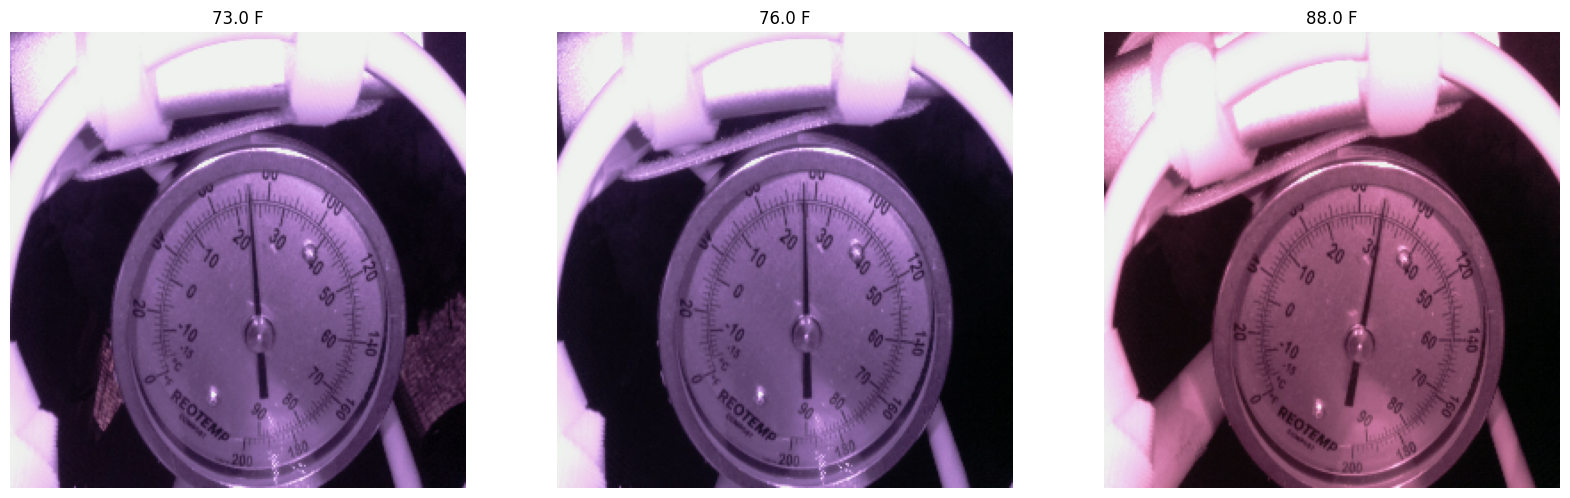

In [5]:
x_train, x_test, y_train, y_test = load_dataset()

print("Finished loading data")

y_train = y_train.map(lambda x: tf.strings.to_number(x))
y_test = y_test.map(lambda x: tf.strings.to_number(x))

# Print out 3 images with labels
plt.figure(figsize=(20, 20))
i = 0
for image, label in tf.data.Dataset.zip((x_train, y_train)).take(3):
    i += 1
    plt.subplot(1, 3, i)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"{label.numpy()} F")
    plt.axis("off")


def normalize_image(img: np.ndarray):
    # standardize
    img = img / 255.
    print("new shape")
    print(img.shape)
    return img


x_train = x_train.map(lambda img: tf.numpy_function(normalize_image, inp=[img], Tout=[tf.float32]))
x_test = x_test.map(lambda img: tf.numpy_function(normalize_image, inp=[img], Tout=[tf.float32]))

print(list(x_test.as_numpy_iterator()))
#print(list(y_test.as_numpy_iterator()))

train_ds = tf.data.Dataset.zip((x_train, y_train))
test_ds = tf.data.Dataset.zip((x_test, y_test))



In [4]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tfl.Conv2D(filters=8, kernel_size=4, strides=1, padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=8, strides=8, padding='same')(A1)
    Z2 = tfl.Conv2D(filters=16, kernel_size=2, strides=1, padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=4, strides=4, padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(6, activation='softmax')(F)

    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model


EPOCHS = 10
BATCH_SIZE = 32

model = convolutional_model((196608,))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy']) # can also use any keras loss fn

model_history = model.fit(train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)


ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 196608)